In [0]:
import numpy as np
import scipy as sp
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans

In [0]:
path = "/content/drive/My Drive/Datathon/"

In [3]:
df = pd.read_csv(path + "mta_key.csv")
df.isnull().sum()

station_id       0
station_name     0
line_name        0
division         0
latitude        26
longitude       26
dtype: int64

In [0]:
df_3_1 = pd.read_csv(path + "nyc_bikeshare_key.csv")

In [0]:
df_3_2 = pd.read_pickle(path+"nyc_bikeshare_1.pickle")

In [0]:
thre_25 = df_3_2[["tripduration"]].quantile(0.25)
thre_50 = df_3_2[["tripduration"]].quantile(0.5)
thre_75 = df_3_2[["tripduration"]].quantile(0.75)

In [0]:
sep_1 = df_3_2.loc[df_3_2["tripduration"].apply(lambda x: x > 0 and x < int(thre_25))]

In [0]:
df_3_2["station_id"] = df_3_2["start_station_id"]

In [0]:
df_3_3 = df_3_2.merge(df_3_1, how = "outer", on = "station_id").dropna(subset = ["tripduration"], axis = 0)

In [0]:
M_F = df_3_3.groupby(["station_name", "gender"]).count()["tripduration"].reset_index()

In [8]:
import gc
del df_3_2
gc.collect()

0

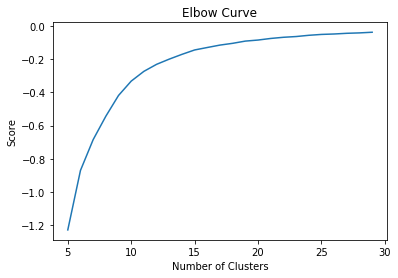

In [11]:
df_sample = df_3_3.sample(frac = 0.001)
K_clusters = range(5,30)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df_sample[["station_latitude"]]
X_axis = df_sample[["station_longitude"]]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 30, init ='k-means++')
kmeans.fit(df_sample[df_sample.columns[1:3]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df_sample['cluster_label'] = kmeans.fit_predict(df_sample[df_sample.columns[1:3]])

In [0]:
df_sample = df_sample[["station_name", "cluster_label"]]

In [0]:
df_3_3.merge(df_sample, how = "outer", on = "station_name")